In [6]:
import os
import datetime

import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

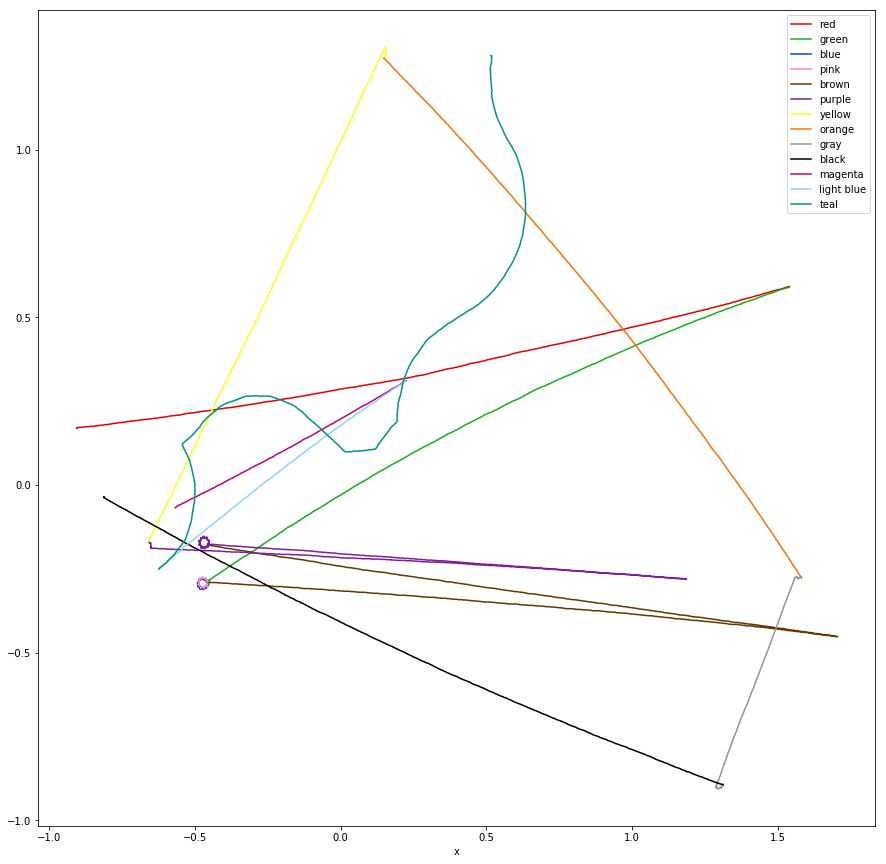

In [30]:
f, ax = plt.subplots(1, 1)
colors = ['xkcd:red', 'xkcd:green', 'xkcd:blue', 'xkcd:pink', 'xkcd:brown', 'xkcd:purple', 'xkcd:yellow', 'xkcd:orange',
          'xkcd:gray', 'xkcd:black', 'xkcd:magenta', 'xkcd:light blue', 'xkcd:teal', 'xkcd:light green']
color_mapping = {}
data_dict = {}
i = 0
for FILE_NAME in os.listdir('..\\DATA\\RAW\\Measure_01'):
    # print(FILE_NAME)
    if FILE_NAME[-7:-4] == 'IMU':
        imu_data = pd.read_csv('..\\DATA\\RAW\\Measure_01\\' + FILE_NAME,
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])
        data_dict[FILE_NAME[:-8]] = {}
        data_dict[FILE_NAME[:-8]]['IMU'] = imu_data
    elif FILE_NAME[-9:-4] == 'MoCap':
        mocap_data = pd.read_csv('..\\DATA\\RAW\\Measure_01\\' + FILE_NAME,
                                 sep='\t',
                                 decimal=',',
                                 names=['time', 'x', 'y', 'z', 'tracked', 'zeta'])
        data_dict[FILE_NAME[:-10]]['MoCap'] = mocap_data
        color_mapping[colors[i][5:]] = FILE_NAME[:-10]
        data_dict[FILE_NAME[:-10]]['color'] = colors[i][5:]
        mocap_data.plot(x='x', y='z', color=colors[i], figsize=(15,15), label=colors[i][5:], ax=ax)
        i+=1
plt.show()

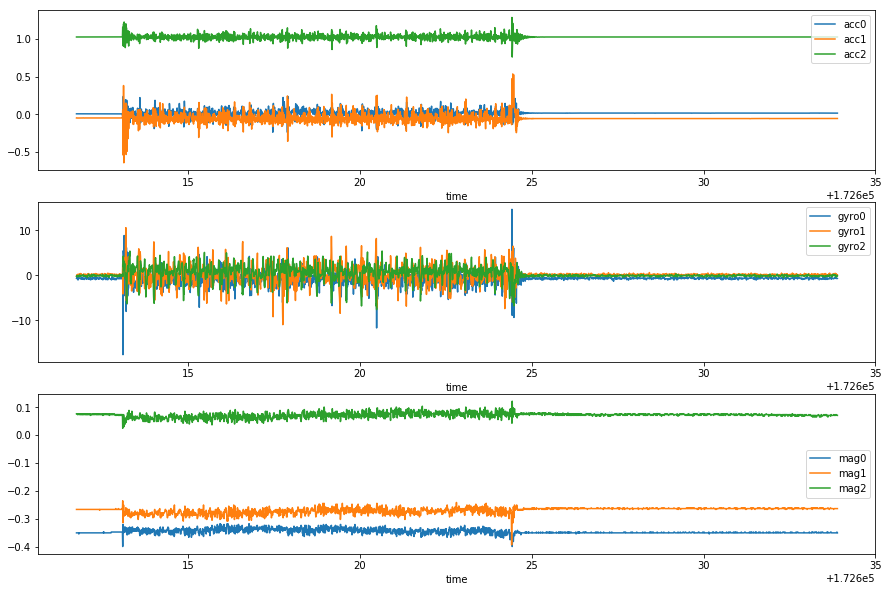

In [6]:
the_chosen_one = 'red'
f1, (ax1, ax2, ax3) = plt.subplots(3, 1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc0', figsize=(15,10), ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc1', ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='acc2', ax=ax1)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro0', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro1', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='gyro2', ax=ax2)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag0', ax=ax3)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag1', ax=ax3)
data_dict[color_mapping[the_chosen_one]]['IMU'].plot(x='time', y='mag2', ax=ax3)